In [1]:
import wget

ModuleNotFoundError: No module named 'wget'

In [2]:
import pip
pip.main(['install', 'wget'])
import wget

  Running setup.py bdist_wheel for wget: started
  Running setup.py bdist_wheel for wget: finished with status 'done'
  Stored in directory: /home/bmacs/.cache/pip/wheels/6d/98/29/61ccc41148f871009126c2e844e26f73eeb25e12cca92228a5
Successfully built wget


In [3]:
try:
    import wget
except:
    import pip
    pip.main(['install', 'wget'])
    import wget

In [4]:
import datetime as dt
import matplotlib.pyplot as plt 
from matplotlib import style
import pandas as pd
try:
    import pandas_datareader.data as web
except:
    import pip
    pip.main(['install', 'pandas_datareader'])
    import pandas_datareader.data as web

/home/bmacs/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


  Running setup.py bdist_wheel for requests-ftp: started
  Running setup.py bdist_wheel for requests-ftp: finished with status 'done'
  Stored in directory: /home/bmacs/.cache/pip/wheels/76/fb/0d/1026eb562c34a4982dc9d39c9c582a734eefe7f0455f711deb
Successfully built requests-ftp


In [5]:
style.use('ggplot')

In [6]:
start = dt.datetime(2000,1,1)
end = dt.datetime(2016,12,31)

In [7]:
class YahooDailyReader():
    
    def __init__(self, symbol=None, start=None, end=None):
        import datetime, time
        self.symbol = symbol
        
        # initialize start/end dates if not provided
        if end is None:
            end = datetime.datetime.today()
        if start is None:
            start = datetime.datetime(2010,1,1)
        
        self.start = start
        self.end = end
        
        # convert dates to unix time strings
        unix_start = int(time.mktime(self.start.timetuple()))
        day_end = self.end.replace(hour=23, minute=59, second=59)
        unix_end = int(time.mktime(day_end.timetuple()))
        
        url = 'https://finance.yahoo.com/quote/{}/history?'
        url += 'period1={}&period2={}'
        url += '&filter=history'
        url += '&interval=1d'
        url += '&frequency=1d'
        self.url = url.format(self.symbol, unix_start, unix_end)
        
    def read(self):
        import requests, re, json
       
        r = requests.get(self.url)
        
        ptrn = r'root\.App\.main = (.*?);\n}\(this\)\);'
        txt = re.search(ptrn, r.text, re.DOTALL).group(1)
        jsn = json.loads(txt)
        df = pd.DataFrame(
                jsn['context']['dispatcher']['stores']
                ['HistoricalPriceStore']['prices']
                )
        df.insert(0, 'symbol', self.symbol)
        df['date'] = pd.to_datetime(df['date'], unit='s').dt.date
        
        # drop rows that aren't prices
        df = df.dropna(subset=['close'])
        
        df = df[['symbol', 'date', 'high', 'low', 'open', 'close', 
                 'volume', 'adjclose']]
        df = df.set_index('symbol')
        return df

In [8]:
ydr = YahooDailyReader('TSLA')
df = ydr.read()

In [9]:
print(df.head(6))

              date        high         low        open       close    volume  \
symbol                                                                         
TSLA    2018-04-10  307.100006  293.679993  298.970001  304.700012  10706172   
TSLA    2018-04-09  309.500000  289.209991  300.369995  289.660004  10231500   
TSLA    2018-04-06  309.279999  295.500000  301.000000  299.299988  13520300   
TSLA    2018-04-05  306.260010  288.200012  289.339996  305.720001  19121100   
TSLA    2018-04-04  288.369995  252.000000  252.779999  286.940002  19896700   
TSLA    2018-04-03  273.350006  254.490005  269.820007  267.529999  18844400   

          adjclose  
symbol              
TSLA    304.700012  
TSLA    289.660004  
TSLA    299.299988  
TSLA    305.720001  
TSLA    286.940002  
TSLA    267.529999  


In [10]:
print(df['open'][0:5])

symbol
TSLA    298.970001
TSLA    300.369995
TSLA    301.000000
TSLA    289.339996
TSLA    252.779999
Name: open, dtype: float64


In [11]:
df.to_csv('tesla.csv')

In [12]:
df = pd.read_csv('tesla.csv')

In [13]:
print(df.head())

  symbol        date        high         low        open       close  \
0   TSLA  2018-04-10  307.100006  293.679993  298.970001  304.700012   
1   TSLA  2018-04-09  309.500000  289.209991  300.369995  289.660004   
2   TSLA  2018-04-06  309.279999  295.500000  301.000000  299.299988   
3   TSLA  2018-04-05  306.260010  288.200012  289.339996  305.720001   
4   TSLA  2018-04-04  288.369995  252.000000  252.779999  286.940002   

     volume    adjclose  
0  10706172  304.700012  
1  10231500  289.660004  
2  13520300  299.299988  
3  19121100  305.720001  
4  19896700  286.940002  


In [14]:
df = pd.read_csv('tesla.csv', parse_dates=True, index_col=0)

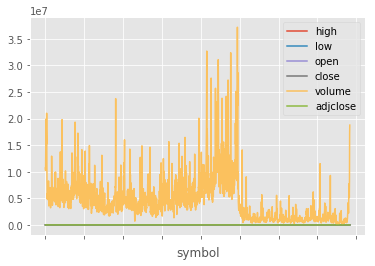

In [15]:
df.plot()
plt.show()

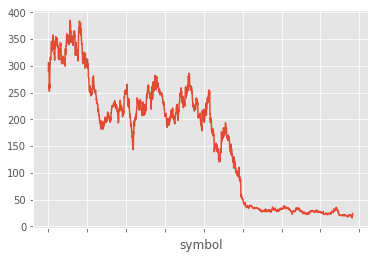

In [16]:
df['adjclose'].plot()
plt.show()

In [17]:
print(df['adjclose'])

symbol
TSLA    304.700012
TSLA    289.660004
TSLA    299.299988
TSLA    305.720001
TSLA    286.940002
TSLA    267.529999
TSLA    252.479996
TSLA    266.130005
TSLA    257.779999
TSLA    279.179993
TSLA    304.179993
TSLA    301.540009
TSLA    309.100006
TSLA    316.529999
TSLA    310.549988
TSLA    313.559998
TSLA    321.350006
TSLA    325.600006
TSLA    326.630005
TSLA    341.839996
TSLA    345.510010
TSLA    327.170013
TSLA    329.100006
TSLA    332.299988
TSLA    328.200012
TSLA    333.350006
TSLA    335.119995
TSLA    330.929993
TSLA    343.059998
TSLA    350.989990
           ...    
TSLA     19.030001
TSLA     19.600000
TSLA     19.590000
TSLA     20.450001
TSLA     21.260000
TSLA     21.950001
TSLA     20.920000
TSLA     19.940001
TSLA     20.350000
TSLA     20.719999
TSLA     20.549999
TSLA     20.950001
TSLA     21.290001
TSLA     21.000000
TSLA     20.219999
TSLA     20.299999
TSLA     21.910000
TSLA     20.639999
TSLA     19.889999
TSLA     19.840000
TSLA     18.139999
TSLA 

In [18]:
print(df[['open', 'high']].head())

              open        high
symbol                        
TSLA    298.970001  307.100006
TSLA    300.369995  309.500000
TSLA    301.000000  309.279999
TSLA    289.339996  306.260010
TSLA    252.779999  288.369995
